In [2]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [3]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
#
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
#
# pip install

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import RobustScaler, Normalizer
from sklearn.model_selection import train_test_split, cross_val_score  
from sklearn.model_selection import GridSearchCV, KFold, StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split 
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from IPython.display import display_html
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

### Область работы 2 (поиск  модели .... )

In [5]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 
path_train ='train.csv' # содержит только имя файла, без имен папок !!!

**Проверяем данные, ищем свинью**

In [6]:
df = pd.read_csv(path_train)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1295 entries, 0 to 1294
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1294 non-null   float64
 1   volatile acidity      1294 non-null   float64
 2   citric acid           1295 non-null   float64
 3   residual sugar        1295 non-null   float64
 4   chlorides             1295 non-null   float64
 5   free sulfur dioxide   1295 non-null   float64
 6   total sulfur dioxide  1295 non-null   float64
 7   density               1295 non-null   float64
 8   pH                    1294 non-null   float64
 9   sulphates             1293 non-null   float64
 10  alcohol               1295 non-null   float64
 11  quality               1295 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 121.5 KB


In [7]:
null = df[df.isnull().any(axis = 1)]
df = df.dropna()
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000
mean,8.443377,0.500701,0.299326,2.572541,0.085473,15.333075,44.625484,0.996579,3.303354,0.678350,10.674167,5.939582
std,1.818346,0.182297,0.200514,1.368263,0.045106,10.470104,35.434022,0.001970,0.157207,0.170034,1.174266,0.955315
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,7.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.200000,0.360000,0.120000,1.900000,0.068000,7.000000,20.000000,0.995325,3.200000,0.570000,9.600000,5.000000
50%,8.100000,0.480000,0.310000,2.200000,0.078000,13.000000,34.000000,0.996600,3.300000,0.640000,10.500000,6.000000
75%,9.400000,0.620000,0.460000,2.600000,0.090000,21.000000,57.000000,0.997795,3.390000,0.760000,11.500000,7.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003200,4.010000,2.000000,14.900000,8.000000


In [8]:
df.duplicated().sum()

276

In [9]:
df = df.drop_duplicates()
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,8.326305,0.529601,0.275714,2.527734,0.088309,15.713300,47.059606,0.996748,3.308227,0.661527,10.419754,5.625616
std,1.730749,0.183901,0.195442,1.352214,0.049185,10.422607,34.510877,0.001850,0.155514,0.176689,1.087667,0.822354
min,4.700000,0.120000,0.000000,0.900000,0.012000,1.000000,7.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.100000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.080000,13.000000,38.000000,0.996760,3.310000,0.620000,10.200000,6.000000
75%,9.250000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997800,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003200,4.010000,2.000000,14.900000,8.000000


In [10]:
print("Ключи load_dataset:\n", df.keys())

Ключи load_dataset:
 Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [11]:
df['quality'] = df['quality'].apply(lambda x: 1 if x> 6 else 0)
y = df['quality']
X = df.drop(['quality'], axis = 1)
y

0       0
1       0
2       0
3       1
4       1
       ..
1285    0
1286    0
1288    0
1289    0
1293    0
Name: quality, Length: 1015, dtype: int64

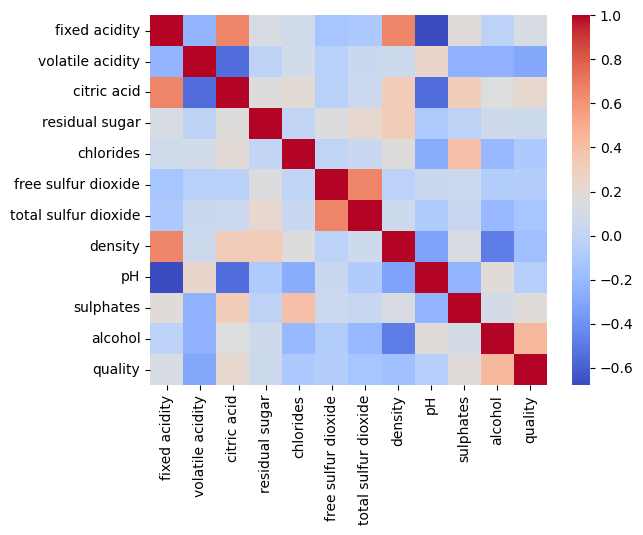

In [12]:
sns.heatmap(df.corr(), cmap = 'coolwarm')
plt.show()

**Метод наивного байеса**

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,y, stratify=y, test_size=0.3)
X_test.shape

(305, 11)

In [14]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('clf',           GaussianNB())])

cv = KFold( n_splits = 5)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling, 
     'clf': [GaussianNB()]}
    ]

grid = GridSearchCV(pipe, param_grid, cv = cv)
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('clf', GaussianNB())]),
             param_grid=[{'clf': [GaussianNB()],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}])

In [15]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,0,1,2,3
mean_fit_time,0.020546,0.024637,0.025333,0.009574
std_fit_time,0.01245,0.019816,0.020368,0.002149
mean_score_time,0.005585,0.007978,0.004588,0.005186
std_score_time,0.000798,0.004416,0.001955,0.001323
param_clf,GaussianNB(),GaussianNB(),GaussianNB(),GaussianNB()
param_preprocessing,MinMaxScaler(),StandardScaler(),RobustScaler(),Normalizer()
params,"{'clf': GaussianNB(), 'preprocessing': MinMaxS...","{'clf': GaussianNB(), 'preprocessing': Standar...","{'clf': GaussianNB(), 'preprocessing': RobustS...","{'clf': GaussianNB(), 'preprocessing': Normali..."
split0_test_score,0.760563,0.760563,0.760563,0.753521
split1_test_score,0.838028,0.838028,0.838028,0.788732
split2_test_score,0.816901,0.816901,0.816901,0.809859


In [16]:
print(grid.best_estimator_)

Pipeline(steps=[('preprocessing', MinMaxScaler()), ('clf', GaussianNB())])


In [17]:
pipe_best = Pipeline(steps=[('preprocessing', MinMaxScaler()), ('clf', GaussianNB())])
pipe_best.fit(X_train,y_train)
y_best = pipe_best.predict(X_test)
matrix_2=confusion_matrix(y_test,y_best)
print(classification_report(y_test, y_best))
print(pipe_best.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91       264
           1       0.45      0.61      0.52        41

    accuracy                           0.85       305
   macro avg       0.70      0.75      0.72       305
weighted avg       0.87      0.85      0.86       305

0.8491803278688524


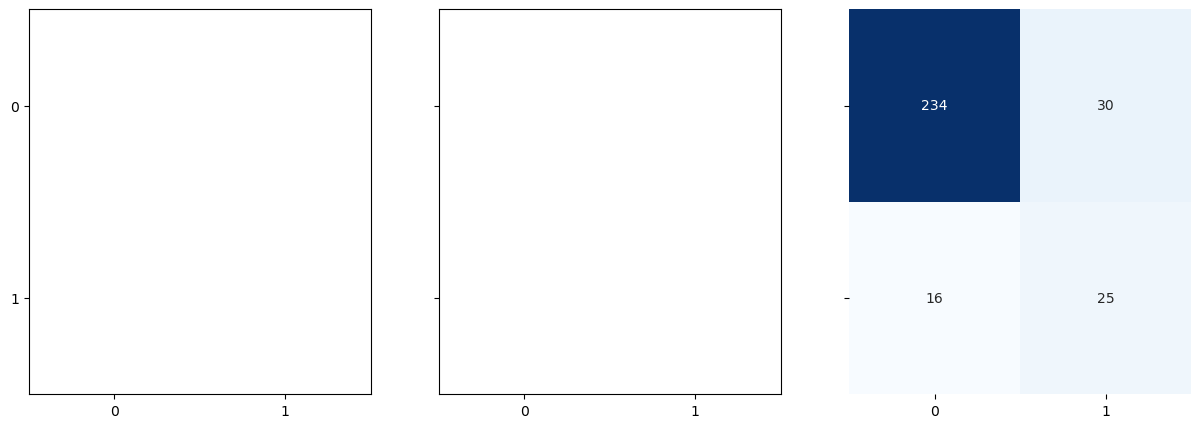

In [18]:
fig,ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(15,5))
sns.heatmap(matrix_2,annot=True, fmt='g', cbar=None,cmap="Blues");


In [19]:
print('\n',classification_report(y_test, y_best))


               precision    recall  f1-score   support

           0       0.94      0.89      0.91       264
           1       0.45      0.61      0.52        41

    accuracy                           0.85       305
   macro avg       0.70      0.75      0.72       305
weighted avg       0.87      0.85      0.86       305



In [23]:

roc_auc_score(y_test, y_best)

0.7480598669623061

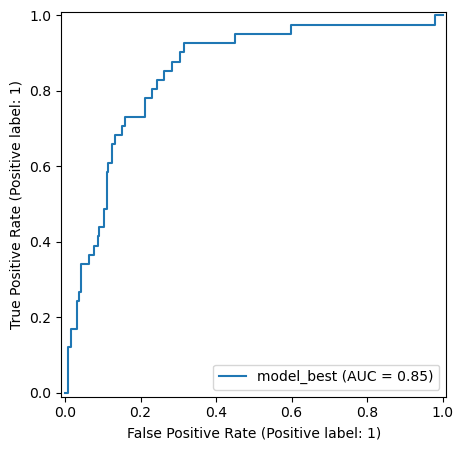

In [22]:

fig, ax_roc = plt.subplots(1,1, figsize=(10, 5))
RocCurveDisplay.from_estimator(pipe_best, X_test, y_test, ax = ax_roc, name = 'model_best');